In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv(r'C:\Users\eliko\OneDrive\שולחן העבודה\ds\finalClean3.csv')
df

,aprt_size,rooms,price,longitude,latitude,WashingMach,Balcony,Elevetor,parking,bus_walking,...,kitchen_own kitchen,kitchen_shared kitchen,heating Type_Kohleofen,heating Type_Unavailable,heating Type_central heating,heating Type_coal stove,heating Type_district heating,heating Type_furnace heating,heating Type_gas heating,heating Type_night storage heater
0,33.0,1.0,850.0,13.502420,52.507540,1.0,1.0,0.0,0.0,3.0,...,1,0,0,0,1,0,0,0,0,0
1,40.0,1.5,850.0,13.351857,52.500805,1.0,0.0,0.0,0.0,12.0,...,1,0,0,1,0,0,0,0,0,0
2,35.0,1.0,799.0,13.295509,52.473641,1.0,0.0,1.0,0.0,11.0,...,0,0,0,1,0,0,0,0,0,0
3,33.0,1.0,819.0,13.265390,52.458389,1.0,1.0,1.0,0.0,15.0,...,0,0,0,1,0,0,0,0,0,0
4,26.0,1.0,600.0,13.513513,52.505395,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,65.0,2.0,700.0,13.323692,52.492764,1.0,1.0,0.0,0.0,9.0,...,0,0,0,1,0,0,0,0,0,0
8663,77.0,2.0,900.0,13.206772,52.499587,1.0,1.0,1.0,0.0,10.0,...,1,0,0,1,0,0,0,0,0,0
8664,105.0,3.5,1200.0,13.320107,52.472577,1.0,0.0,0.0,1.0,12.0,...,1,0,0,0,0,0,0,0,1,0
8665,56.0,1.0,742.0,13.466438,52.519140,0.0,0.0,0.0,0.0,4.0,...,1,0,0,0,0,1,0,0,0,0


scaling the exact columns we want from the dataframe

In [6]:
scale = StandardScaler()
to_be_scaled_list = ['dist','aprt_size','rooms']
for cat in to_be_scaled_list:
    vec = np.array(df[cat])
    vec = vec.reshape(-1, 1)
    transformed_data = scale.fit_transform(vec)
    df[cat] = transformed_data

dataframe after scaling

In [7]:
df

,aprt_size,rooms,price,longitude,latitude,WashingMach,Balcony,Elevetor,parking,bus_walking,...,kitchen_own kitchen,kitchen_shared kitchen,heating Type_Kohleofen,heating Type_Unavailable,heating Type_central heating,heating Type_coal stove,heating Type_district heating,heating Type_furnace heating,heating Type_gas heating,heating Type_night storage heater
0,-1.008090,-0.993905,850.0,13.502420,52.507540,1.0,1.0,0.0,0.0,3.0,...,1,0,0,0,1,0,0,0,0,0
1,-0.680919,-0.351440,850.0,13.351857,52.500805,1.0,0.0,0.0,0.0,12.0,...,1,0,0,1,0,0,0,0,0,0
2,-0.914613,-0.993905,799.0,13.295509,52.473641,1.0,0.0,1.0,0.0,11.0,...,0,0,0,1,0,0,0,0,0,0
3,-1.008090,-0.993905,819.0,13.265390,52.458389,1.0,1.0,1.0,0.0,15.0,...,0,0,0,1,0,0,0,0,0,0
4,-1.335262,-0.993905,600.0,13.513513,52.505395,1.0,1.0,1.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8662,0.487551,0.291026,700.0,13.323692,52.492764,1.0,1.0,0.0,0.0,9.0,...,0,0,0,1,0,0,0,0,0,0
8663,1.048417,0.291026,900.0,13.206772,52.499587,1.0,1.0,1.0,0.0,10.0,...,1,0,0,1,0,0,0,0,0,0
8664,2.357104,2.218421,1200.0,13.320107,52.472577,1.0,0.0,0.0,1.0,12.0,...,1,0,0,0,0,0,0,0,1,0
8665,0.066902,-0.993905,742.0,13.466438,52.519140,0.0,0.0,0.0,0.0,4.0,...,1,0,0,0,0,1,0,0,0,0


split the dataframe to X and Y and after that we split them to train and test in order to test it on a regression model

In [8]:
X = df.drop(['price','url'],axis=1)
y = df.price

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45)

correlations table of all the dataframe columns

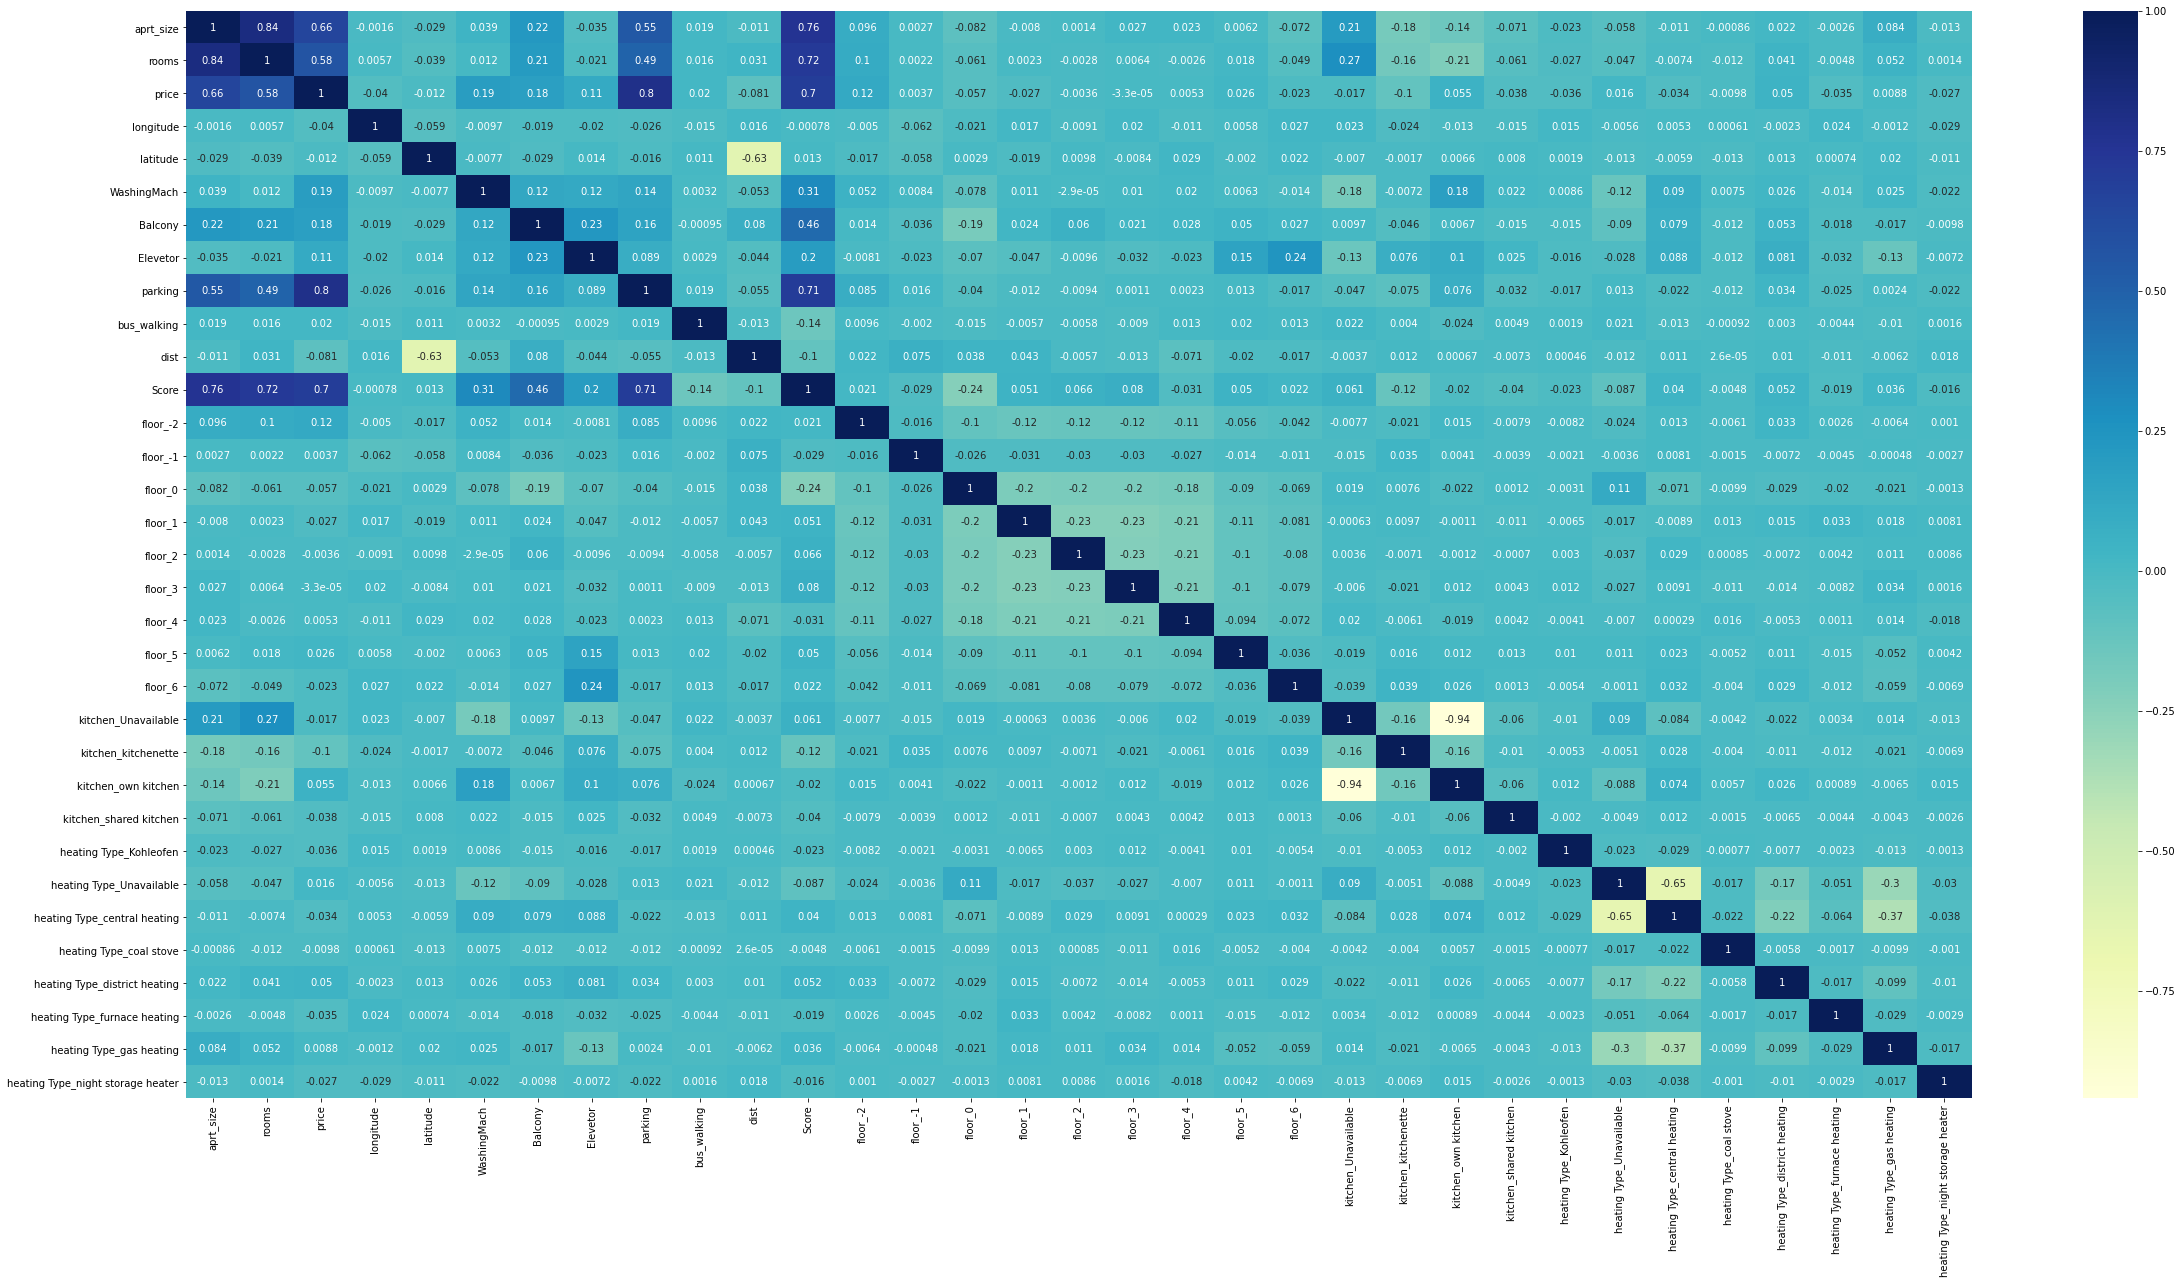

In [10]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [11]:
df.corr()

,aprt_size,rooms,price,longitude,latitude,WashingMach,Balcony,Elevetor,parking,bus_walking,...,kitchen_own kitchen,kitchen_shared kitchen,heating Type_Kohleofen,heating Type_Unavailable,heating Type_central heating,heating Type_coal stove,heating Type_district heating,heating Type_furnace heating,heating Type_gas heating,heating Type_night storage heater
aprt_size,1.000000,0.840153,0.657621,-0.001637,-0.029041,0.039036,0.223770,-0.034621,0.546653,0.018648,...,-0.144592,-0.070729,-0.022623,-0.058396,-0.010504,-0.000863,0.021616,-0.002644,0.083583,-0.012653
rooms,0.840153,1.000000,0.575255,0.005701,-0.039484,0.011608,0.211270,-0.020575,0.489669,0.016094,...,-0.212801,-0.061446,-0.027442,-0.047369,-0.007424,-0.011531,0.040556,-0.004771,0.052182,0.001417
price,0.657621,0.575255,1.000000,-0.039804,-0.011981,0.192541,0.175654,0.106343,0.799415,0.019561,...,0.055152,-0.037774,-0.036257,0.016051,-0.034232,-0.009810,0.049883,-0.034926,0.008820,-0.027034
longitude,-0.001637,0.005701,-0.039804,1.000000,-0.059485,-0.009730,-0.019134,-0.019574,-0.025693,-0.015391,...,-0.013464,-0.014928,0.015075,-0.005624,0.005346,0.000609,-0.002278,0.023635,-0.001177,-0.029457
latitude,-0.029041,-0.039484,-0.011981,-0.059485,1.000000,-0.007746,-0.029287,0.014091,-0.016445,0.011437,...,0.006582,0.007962,0.001869,-0.013291,-0.005884,-0.013163,0.013205,0.000738,0.019615,-0.011422
WashingMach,0.039036,0.011608,0.192541,-0.009730,-0.007746,1.000000,0.122790,0.118947,0.142902,0.003177,...,0.180847,0.021660,0.008563,-0.122921,0.090389,0.007501,0.025585,-0.013789,0.025287,-0.021947
Balcony,0.223770,0.211270,0.175654,-0.019134,-0.029287,0.122790,1.000000,0.227453,0.156738,-0.000948,...,0.006742,-0.014538,-0.014782,-0.090158,0.078862,-0.012088,0.052579,-0.017705,-0.017011,-0.009791
Elevetor,-0.034621,-0.020575,0.106343,-0.019574,0.014091,0.118947,0.227453,1.000000,0.088971,0.002902,...,0.103697,0.024768,-0.016252,-0.028163,0.087572,-0.012111,0.080836,-0.031508,-0.128214,-0.007176
parking,0.546653,0.489669,0.799415,-0.025693,-0.016445,0.142902,0.156738,0.088971,1.000000,0.018558,...,0.075662,-0.032118,-0.016750,0.012606,-0.022101,-0.012482,0.033763,-0.024642,0.002399,-0.021631
bus_walking,0.018648,0.016094,0.019561,-0.015391,0.011437,0.003177,-0.000948,0.002902,0.018558,1.000000,...,-0.024209,0.004869,0.001932,0.020605,-0.013362,-0.000924,0.003019,-0.004399,-0.010211,0.001633


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667 entries, 0 to 8666
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   aprt_size                          8667 non-null   float64
 1   rooms                              8667 non-null   float64
 2   price                              8667 non-null   float64
 3   longitude                          8667 non-null   float64
 4   latitude                           8667 non-null   float64
 5   WashingMach                        8667 non-null   float64
 6   Balcony                            8667 non-null   float64
 7   Elevetor                           8667 non-null   float64
 8   parking                            8667 non-null   float64
 9   bus_walking                        8667 non-null   float64
 10  url                                8667 non-null   object 
 11  dist                               8667 non-null   float

our first model: Linear Regression

In [13]:
regr =LinearRegression()
# Train the model using the training sets
regr.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(X_test)
print("r2: %.2f" % r2_score(y_test, y_pred))

r2: 0.73


Lasso Regressor

In [14]:
las=Lasso(alpha=0.0001)
las.fit(X_train,y_train)
y_pred=las.predict(X_test)
print("r2: %.2f" % r2_score(y_test, y_pred))

r2: 0.73


C:\Users\eliko\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48868639.39007929, tolerance: 107007.69255528632
  model = cd_fast.enet_coordinate_descent(


Random Forest Regressor

In [15]:
regr = RandomForestRegressor()
regr.fit(X=X_train, y=y_train)
predicted_tree_rand=regr.predict(X_test)
print("r2: %.2f" % r2_score(y_test, predicted_tree_rand))

r2: 0.75


we can see that all the models bring mostly the same range of score.

now were going to show you some of the predictions.

In [18]:
def testTheTest(test_val,predicted_val):
    dic={}
    dic["Predicted"] = predicted_val
    dic["Test"] = test_val
    df1 = pd.DataFrame(dic)
    df1.reset_index(inplace=True)
    del df1["index"]
    df1=df1.astype(float)
    return df1

In [19]:
val={}
val=testTheTest(y_test,predicted_tree_rand)
print(val)

      Predicted    Test
0        765.83   500.0
1        600.09   559.0
2        701.41   550.0
3        632.14   537.0
4        625.06   900.0
...         ...     ...
1729     558.15   850.0
1730    1395.47  1070.0
1731     677.99   950.0
1732     580.25   520.0
1733     667.63  1000.0

[1734 rows x 2 columns]
